# Preliminary Data Analysis with Sample Data

In [1]:
#Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy import stats as st
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
%matplotlib inline

As a part of the preliminary data analysis, will be working on 30% of the data.

1. Within the 30% of the data, will be splitting the data into train and test.

2. Will be validating the models with the sample before working on the full datasets.

3. Precision of the models are validated through the recall_precision_curve.


In [2]:
#Reading the clean file
masterData = pd.read_csv('Backorder.csv')
masterData.head()


,product_id,current_inventory,transit_duration,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_has_issue,source_performance_6_months,source_performance_12_months,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,0.0,No,0.84,0.83,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,No,0.99,0.99,No,No,No,Yes,No,No
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,0.0,No,0.84,0.83,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,1.0,No,0.10,0.13,No,No,No,Yes,No,No
4,1044048,8.0,8.0,0.0,0.0,0.0,4.0,2.0,No,0.84,0.83,Yes,No,No,Yes,No,No


In [3]:
#Preparing the data for modeling
#X = pd.DataFrame(masterData.columns)
X = masterData[masterData.columns]
y = masterData['went_on_backorder']
X.shape, y.shape

((1861509, 17), (1861509,))

In [4]:
#Convert the categorical data into numerical
y = y.replace('Yes', 1)
y = y.replace('No', 0)
X['source_has_issue'] = X.source_has_issue.map({'Yes':1, 'No':0})
X['deck_risk'] = X.deck_risk.map({'Yes':1, 'No':0})
X['oe_constraint'] = X.oe_constraint.map({'Yes':1, 'No':0})
X['ppap_risk'] = X.ppap_risk.map({'Yes':1, 'No':0})
X['stop_auto_buy'] = X.stop_auto_buy.map({'Yes':1, 'No':0})
X['rev_stop'] = X.rev_stop.map({'Yes':1, 'No':0})
X = X.drop(['went_on_backorder', 'source_has_issue', 'rev_stop', 'deck_risk', 'ppap_risk', 'stop_auto_buy','product_id'], axis = 1, errors = 'ignore')
X.shape, y.shape

((1861509, 10), (1861509,))

In [5]:
#get the 30% of the data
X_sample, X_data, y_sample, y_data = train_test_split(X, y, test_size = 0.70, random_state = 42)
X_sample.shape, y_sample.shape, X_data.shape, y_data.shape

((558452, 10), (558452,), (1303057, 10), (1303057,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.30, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((390916, 10), (167536, 10), (390916,), (167536,))

# Training the KNN Model Classifier

In [7]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_jobs = -1))]
#Create the pipeline: pipeline
pipeline_knn = Pipeline(steps)

# Fit to the training set
pipeline_knn.fit(X_train, y_train)
knn_prediction = pipeline_knn.predict( X_test )
# get the classification report
knn_report = classification_report( y_test, knn_prediction )
#print the report
print(knn_report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    166307
           1       0.29      0.02      0.04      1229

    accuracy                           0.99    167536
   macro avg       0.64      0.51      0.52    167536
weighted avg       0.99      0.99      0.99    167536



# Training the SVC Model Classifier

In [ ]:
steps = [('scaler', StandardScaler()),
        ('svc', svm.SVC(class_weight = 'balanced'))]
#Create the pipeline: pipeline
pipeline_svc = Pipeline(steps)

# Fit to the training set
pipeline_svc.fit(X_train, y_train)
svc_prediction = pipeline_svc.predict( X_test )
# get the classification report
svc_report = classification_report( y_test, svc_prediction )
#print the report
print(svc_report)

# Training the LogisticRegression Model 

In [8]:
steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression(class_weight = 'balanced'))]
#Create the pipeline: pipeline
pipeline_logreg = Pipeline(steps)

# Fit to the training set
pipeline_logreg.fit(X_train, y_train)
logreg_prediction = pipeline_logreg.predict( X_test )
# get the classification report
logreg_report = classification_report( y_test, logreg_prediction )
#print the report
print(logreg_report)

C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      0.64      0.78    166307
           1       0.01      0.68      0.03      1229

    accuracy                           0.64    167536
   macro avg       0.50      0.66      0.40    167536
weighted avg       0.99      0.64      0.77    167536



# Training the RandomForest Classifier

In [9]:
#Train default RandomForest on 30% of the data
rfmodel = RandomForestClassifier(random_state = 42)
#Fit the training set
rfmodel.fit(X_train, y_train)
rfmodel_prediction = rfmodel.predict(X_test)
#get the classification report
rfmodel_report =  classification_report(y_test, rfmodel_prediction)
#print the report
print(rfmodel_report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    166307
           1       0.59      0.09      0.15      1229

    accuracy                           0.99    167536
   macro avg       0.79      0.54      0.57    167536
weighted avg       0.99      0.99      0.99    167536



# Training GradientBoosting Classifier model

In [10]:
#Train default RandomForest on 30% of the data
gbmodel = GradientBoostingClassifier(random_state = 42)
#Fit the training set
gbmodel.fit(X_train, y_train)
gbmodel_prediction = gbmodel.predict(X_test)
#get the classification report
gbmodel_report =  classification_report(y_test, gbmodel_prediction)
#print the report
print(gbmodel_report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    166307
           1       0.41      0.02      0.04      1229

    accuracy                           0.99    167536
   macro avg       0.70      0.51      0.52    167536
weighted avg       0.99      0.99      0.99    167536



# Training AdaBoostClassifier Model

In [11]:
#Train default RandomForest on 30% of the data
abmodel = AdaBoostClassifier(random_state = 42)
#Fit the training set
abmodel.fit(X_train, y_train)
abmodel_prediction = abmodel.predict(X_test)
#get the classification report
abmodel_report =  classification_report(y_test, abmodel_prediction)
#print the report
print(abmodel_report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    166307
           1       0.26      0.03      0.05      1229

    accuracy                           0.99    167536
   macro avg       0.62      0.51      0.52    167536
weighted avg       0.99      0.99      0.99    167536



# Training the AdaBoostClassifier with RandomForest Estimator

In [16]:
#Train default RandomForest on 30% of the data
abmodel_rf = AdaBoostClassifier(base_estimator = rfmodel, random_state = 42)
#Fit the training set
abmodel_rf.fit(X_train, y_train)
abmodel_prediction_rf = abmodel_rf.predict(X_test)
#get the classification report
abmodel_report_rf =  classification_report(y_test, abmodel_prediction_rf)
#print the report
print(abmodel_report_rf)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    166307
           1       0.57      0.07      0.13      1229

    accuracy                           0.99    167536
   macro avg       0.78      0.54      0.56    167536
weighted avg       0.99      0.99      0.99    167536



In [17]:
feature_import_rf = pd.Series(rfmodel.feature_importances_, index = X_test.columns)
feature_import_rf.sort_values(ascending = False)


source_performance_12_months    0.145485
current_inventory               0.142338
source_performance_6_months     0.141375
prior_sales_9_month             0.135402
prior_sales_6_month             0.117561
prior_sales_3_month             0.102296
minimum_recommend_stock         0.081409
prior_sales_1_month             0.079745
transit_duration                0.053530
oe_constraint                   0.000860
dtype: float64

In [18]:
feature_import_gb = pd.Series(gbmodel.feature_importances_, index = X_test.columns)
feature_import_gb.sort_values(ascending = False)


current_inventory               0.403399
prior_sales_9_month             0.147748
prior_sales_1_month             0.119243
prior_sales_3_month             0.113607
prior_sales_6_month             0.070783
minimum_recommend_stock         0.047207
source_performance_6_months     0.042519
source_performance_12_months    0.042152
transit_duration                0.011791
oe_constraint                   0.001552
dtype: float64

# Traning the AdaBoostClassifier with GradientBoosting Estimator

In [19]:
#Train default AdaBoost model with the GB estimator
abmodel_gb = AdaBoostClassifier(base_estimator = gbmodel, random_state = 42)
#Fit the training model
abmodel_gb.fit(X_train, y_train)
abmodel_prediction_gb = abmodel_gb.predict(X_test)
#get the classication report
abmodel_report_gb = classification_report(y_test, abmodel_prediction_gb)
#print the report
print(abmodel_report_gb)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    166307
           1       0.37      0.04      0.08      1229

    accuracy                           0.99    167536
   macro avg       0.68      0.52      0.54    167536
weighted avg       0.99      0.99      0.99    167536



Text(0.5, 1.0, 'ROC Curve')

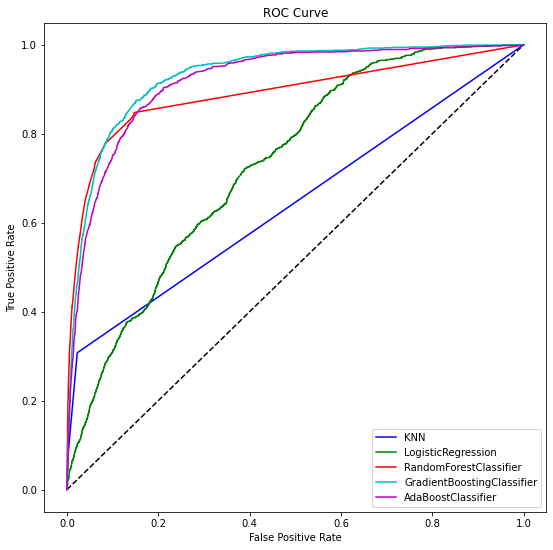

In [21]:
#plot ROC Curves
fig , ax1 = plt.subplots(figsize=(9,9) )
plt.plot([0, 1], [0, 1], 'k--')
estimators =[pipeline_knn, pipeline_logreg, rfmodel, gbmodel, abmodel ]
classifiers=['KNN', 'LogisticRegression', 'RandomForestClassifier','GradientBoostingClassifier',
           'AdaBoostClassifier']
colors = ['b', 'g', 'r', 'c', 'm']
for i, estimator in enumerate(estimators):
    y_pred_prob = estimator.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=classifiers[i],color=colors[i]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.title('ROC Curve')

Text(0.5, 1.0, 'Recall Precision Curve')

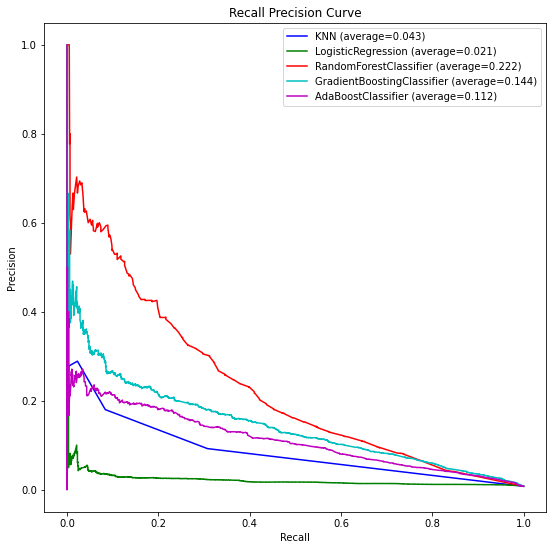

In [22]:
#plot Recall-Precision Curves
fig , ax1 = plt.subplots(figsize=(9,9) )
estimators =[pipeline_knn, pipeline_logreg, rfmodel, gbmodel, abmodel ]
classifiers=['KNN', 'LogisticRegression', 'RandomForestClassifier','GradientBoostingClassifier',
           'AdaBoostClassifier']
colors = ['b', 'g', 'r', 'c', 'm']
for i, estimator in enumerate(estimators):
    y_pred_prob = estimator.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test,y_pred_prob)
    average_precision= average_precision_score(y_test, y_pred_prob, average="micro")
    plt.plot(recall, precision, label='%s (average=%.3f)'%(classifiers[i],average_precision), color=colors[i])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=1)
plt.title('Recall Precision Curve')